Rully Lukas

1103200181

Public Iris Dataset

In [ ]:
# Mengimpor library yang diperlukan
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.decomposition import PCA

In [ ]:
# Memuat dataset Iris
iris = load_iris()

In [ ]:
# Membuat dataframe dari dataset Iris
iris_df = pd.DataFrame(data= np.c_[iris['data'], iris['target']],
                       columns= iris['feature_names'] + ['target'])

# Membagi dataset menjadi data fitur (X) dan target (y)
X = iris.data
y = iris.target

# Membagi dataset menjadi data latih dan data uji
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Membuat model K-Nearest Neighbors
knn = KNeighborsClassifier(n_neighbors=3)

# Melatih model pada data latih
knn.fit(X_train, y_train)

# Memprediksi kelas target untuk data uji
y_pred = knn.predict(X_test)

In [ ]:
# Evaluasi model
accuracy = accuracy_score(y_test, y_pred)
report = classification_report(y_test, y_pred, target_names=iris.target_names)
conf_matrix = confusion_matrix(y_test, y_pred)


# Menampilkan hasil evaluasi
print("Accuracy:", accuracy)
print("Classification Report:")
print(report)

Accuracy: 1.0
Classification Report:
              precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        10
  versicolor       1.00      1.00      1.00         9
   virginica       1.00      1.00      1.00        11

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



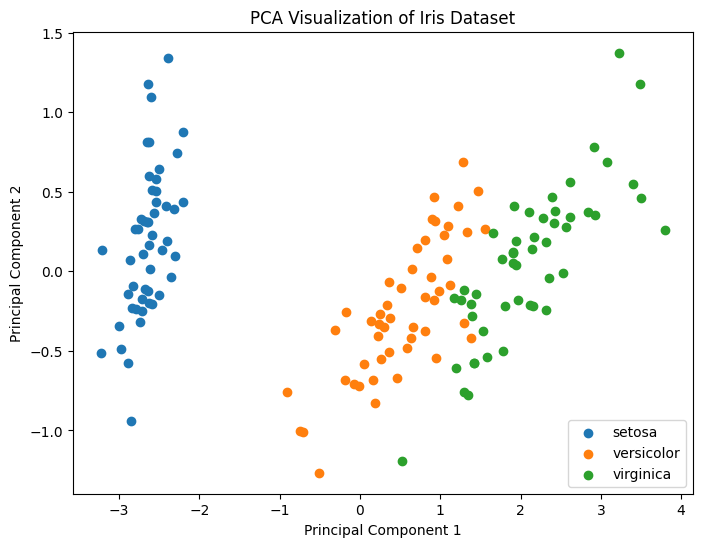

In [ ]:
# Reduksi dimensi ke 2 untuk visualisasi
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

# Visualisasi data
plt.figure(figsize=(8, 6))
for i in range(len(iris.target_names)):
    plt.scatter(X_pca[y == i, 0], X_pca[y == i, 1], label=iris.target_names[i])
plt.title('PCA Visualization of Iris Dataset')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

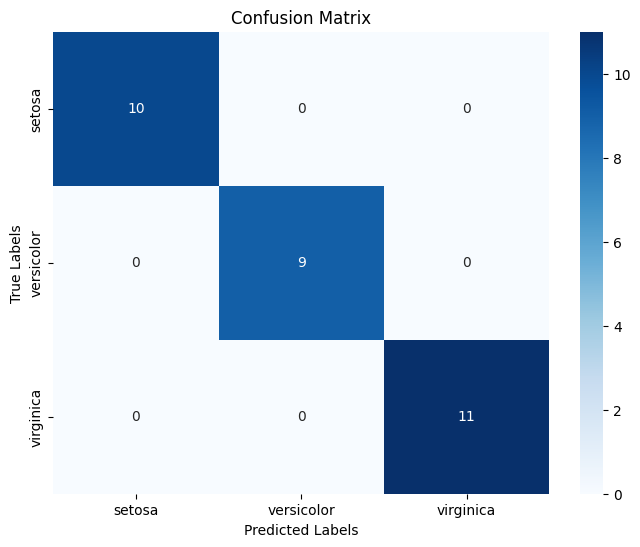

In [ ]:
# Membuat confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Membuat heatmap confusion matrix menggunakan seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, cmap='Blues', xticklabels=iris.target_names, yticklabels=iris.target_names)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()